# Zillow Cluster Project

In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Add more libraries below this line as needed.

In [2]:
import os
import env
import acquire
import wrangle
import explore

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.
Imported prepare.py successfully


# Acquire

In [3]:
df = wrangle.get_zillow_data()
df.shape

(77381, 70)

In [4]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [6]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


# Prep

### First step, remove columns that I know I won't be needing

A lot of missing values, however I will remove the columns I don't think I'll be needing first, then address missing rows.

In [7]:
# Dropping columns I don't think I'll need. If I do end up needing them, come back to this point after the MVP is done.

df = wrangle.drop_cols(df)
df.shape

(77381, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   basementsqft                  50 non-null     float64
 7   bathroomcnt                   77381 non-null  float64
 8   bedroomcnt                    77381 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77185 non-null  float64
 12  finishedsquarefeet13          41 non-null     float64
 13  f

In [9]:
# I need to isolate down to only single unit properties, which equate to this list:

id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [10]:
# Now I have 20k less rows, so good for the most part. Now need to cut down the columns:

df = wrangle.prep_data(df, id_list)
df.shape

(52244, 50)

In [11]:
df = wrangle.handle_missing_values(df, col_limit = .6, row_limit = .6)
df.shape

(52244, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52244 entries, 0 to 77380
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52244 non-null  float64
 1   bathroomcnt                   52244 non-null  float64
 2   bedroomcnt                    52244 non-null  float64
 3   calculatedfinishedsquarefeet  52236 non-null  float64
 4   fips                          52244 non-null  float64
 5   latitude                      52244 non-null  float64
 6   longitude                     52244 non-null  float64
 7   lotsizesquarefeet             51883 non-null  float64
 8   regionidcity                  51216 non-null  float64
 9   roomcnt                       52244 non-null  float64
 10  yearbuilt                     52204 non-null  float64
 11  structuretaxvaluedollarcnt    52172 non-null  float64
 12  taxvaluedollarcnt             52243 non-null  float64
 13  l

In [13]:
# I don't need this column any more.
df.drop(columns = ['propertylandusetypeid'], inplace = True)


In [14]:
df.isna().sum().sort_values(ascending = False)

regionidcity                    1028
lotsizesquarefeet                361
structuretaxvaluedollarcnt        72
yearbuilt                         40
calculatedfinishedsquarefeet       8
taxamount                          4
landtaxvaluedollarcnt              1
taxvaluedollarcnt                  1
logerror                           0
roomcnt                            0
longitude                          0
latitude                           0
fips                               0
bedroomcnt                         0
bathroomcnt                        0
dtype: int64

## Things on my mind:

- Will clustering be beneficial to my understanding of the data and relationships
- Are there new features I can create from my current feature list that will do a better job of predicting `logerror`?

In [15]:
pd.set_option('display.max_columns', 40)

# Adding new dummy columns:

county_df = pd.get_dummies(df.fips)
county_df.head(1)

county_df.columns = ["LA", "Orange", "Ventura"]
# df_dummies = pd.concat([df, county_df], axis = 1)
df = pd.concat([df, county_df], axis = 1)
print(df.shape)
df.head(1)

(52244, 18)


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura
0,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,53571.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,0,1,0


In [16]:
# adding features:

def create_features(df):
    df['age'] = 2017 - df.yearbuilt

    # create taxrate variable
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560
    
    # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquarefeet

    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.landtaxvaluedollarcnt/df.lotsizesquarefeet
    
    # ratio of beds to baths
    df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt
    
    
    
    return df

In [17]:
df = create_features(df)

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

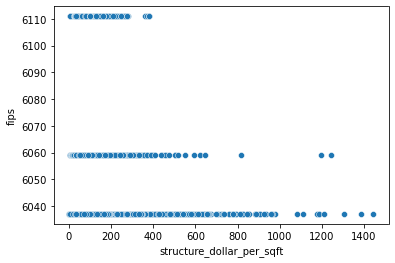

In [18]:
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

# Note there are only about 8 outliers that are making the 4th quartile to the max value extremely large compared to the rest of the quartiles.
# These kind of outliers will greatly affect the clustering models. Need to remove them.

In [19]:
# Need to remove outliers because outliers have a very large negative impact on clustering.

def remove_outliers():
    '''
    remove outliers in in structure dollars and land dollars.
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) &  
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.acres < 10) &
               (df.calculatedfinishedsquarefeet < 7000) & 
               (df.taxrate < .05) &
               (df.structure_dollar_per_sqft < 1001) &
               (df.land_dollar_per_sqft < 1501)
              )]

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

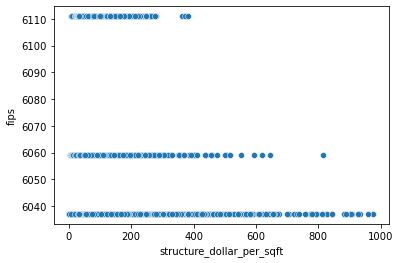

In [20]:
df = remove_outliers()
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='structure_dollar_per_sqft'>

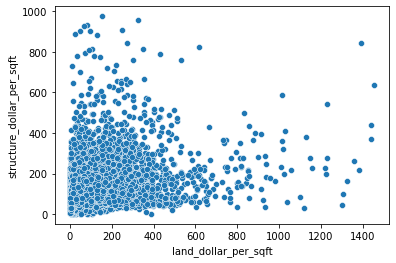

In [21]:
sns.scatterplot(x = 'land_dollar_per_sqft', y = 'structure_dollar_per_sqft', data = df)

In [22]:
df.isnull().sum().sort_values(ascending = False)

regionidcity                    970
age                              32
yearbuilt                        32
bed_bath_ratio                    0
structuretaxvaluedollarcnt        0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
roomcnt                           0
taxvaluedollarcnt                 0
land_dollar_per_sqft              0
landtaxvaluedollarcnt             0
taxamount                         0
logerror                          0
LA                                0
Orange                            0
Ventura                           0
taxrate                           0
acres                             0
structure_dollar_per_sqft         0
bathroomcnt                       0
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.shape

(50441, 24)

In [25]:
df[df.fips == 6037].logerror.mean(), df[df.fips == 6059].logerror.mean(), df[df.fips == 6111].logerror.mean()

In [26]:
# df_la = df[df.LA == 1].drop(columns = ['Orange', 'Ventura'])
# df_la.shape

In [27]:
# df_o = df[df.Orange == 1].drop(columns = ['LA', 'Ventura'])
# df_v = df[df.Ventura == 1].drop(columns = ['Orange', 'LA'])
# df_o.shape, df_v.shape

In [28]:
# df_la.head(1)

In [29]:
# Checking to see the count of fips in each new county df. Making sure there wasn't any leakage between them.

# df_la.fips.value_counts(), df_o.fips.value_counts(), df_v.fips.value_counts()

At this point, I'd want to do everything in triplets, but I think that'll take too long so I'm going to continue using the main dataframe and just add a county column so that I can still divide things by county.

## Splitting Data

In [30]:
train, validate, test = wrangle.split_zillow_data(df)

Shape of train df: (34299, 24)
Shape of validate df: (8575, 24)
Shape of test df: (7567, 24)


In [31]:
# Impute missing values
train.isna().sum().sort_values(ascending = False)

bed_bath_ratio                  0
land_dollar_per_sqft            0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
bathroomcnt                     0
dtype: int64

In [32]:
# No need to run this since there are no missing values...

train, validate, test = wrangle.impute_missing_values_all(train, validate, test)
train.head()

# Don't forget to .cut() in this area
# bin by age of house, county, tax bracket, and sq footage for starters

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
65326,2.0,3.0,1792.0,6059.0,33.634330,-117.649778,5700.0,12773.0,7.0,1977.0,134428.0,285017.0,150589.0,2902.88,0.008833,0,1,0,40.0,0.010185,0.130854,75.015625,26.419123,1.5
39133,1.0,2.0,808.0,6037.0,34.051418,-117.783166,6607.0,20008.0,0.0,1949.0,84258.0,164187.0,79929.0,2117.28,0.034919,1,0,0,68.0,0.012896,0.151676,104.279703,12.097624,2.0
23583,2.0,4.0,1885.0,6037.0,34.668767,-118.217578,9735.0,5534.0,0.0,1994.0,134000.0,252000.0,118000.0,3821.21,-0.002291,1,0,0,23.0,0.015164,0.223485,71.087533,12.121212,2.0
42503,3.0,3.0,2008.0,6059.0,33.467026,-117.626024,11200.0,13693.0,0.0,1987.0,200776.0,775000.0,574224.0,7791.86,0.019921,0,1,0,30.0,0.010054,0.257117,99.988048,51.270000,1.0
3688,1.0,3.0,896.0,6037.0,34.598082,-118.110336,6811.0,40227.0,0.0,1954.0,45716.0,65937.0,20221.0,1504.52,0.180875,1,0,0,63.0,0.022818,0.156359,51.022321,2.968874,3.0


In [33]:
X_train, X_validate, X_test, X_train_explore, X_train_explore_scaled, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = explore.split_scale(df)

In [34]:
X_train.shape, X_train_scaled.shape, X_train_explore.shape

((28246, 23), (28246, 23), (28246, 24))

## End of prep:

- All missing values accounted for
- All columns still in dataframe are ones I need for analysis
- Data not yet scaled, need to accomplish this before moving on with rest of Explore stage

## *Outliers still need to be dealt with after the MVP is complete*

# Explore Stage

- Based on Faith's advice for the MVP, I will be exploring based upon unscaled train, validate, and test data.
- However, when it comes time to model, I'll need to scale the data. I would prefer to have that step completed at end of prep, so will add scaling section here
### y_train ==  `logerror`

### Looking for strong linear correlations

- Exploration of the data yielded fewer results than expected; however there were several combinations of features that produced some slightly linearly correlated results, and thus those features were strongly considered in the cluster and modeling stages.

#### Comparing total square feet of the house to `logerror`

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

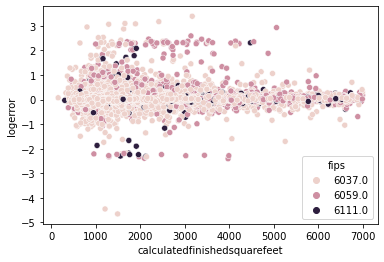

In [36]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = df, hue = 'fips')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

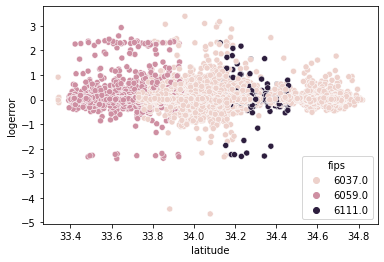

In [37]:
sns.scatterplot(x = 'latitude', y = 'logerror', data = df, hue = 'fips')

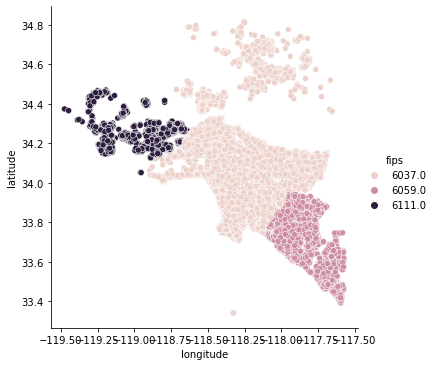

In [38]:
sns.relplot(x="longitude", y="latitude", hue="fips", data=df)

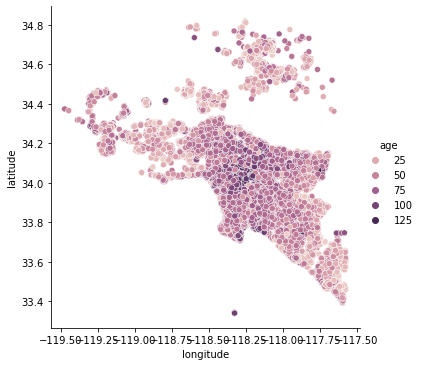

In [39]:
sns.relplot(x="longitude", y="latitude", hue="age", data=df)

In [40]:
# Are there any features that I want to create from the existing data? Any I want to take away?
# First let's check the distributions of the existing cleaned columns:

In [139]:
# converting fips code to int. Will need to convert to string if I import into Tableau.
df_viz = df.copy()

df_viz['fips'] = df_viz['fips'].astype('int')

conditions = [
    (df_viz['fips'] == 6037),
    (df_viz['fips'] == 6059),
    (df_viz['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

df_viz['county'] = np.select(conditions, county_list)
df_viz.shape

(50441, 25)

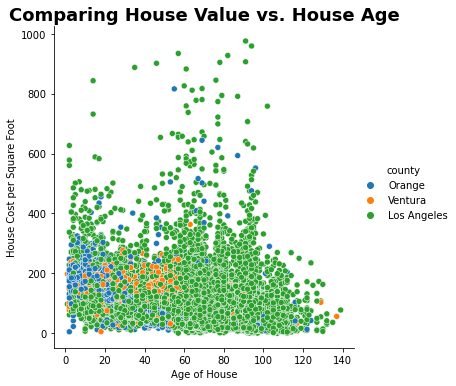

In [143]:
sns.relplot(x="age", y="structure_dollar_per_sqft", hue="county", data=df_viz)
plt.title("Comparing House Value vs. House Age", fontsize = 18, fontweight = 'bold')
plt.xlabel("Age of House")
plt.ylabel("House Cost per Square Foot")
plt.show()

#### Not much of a pattern here. Need to do more research.

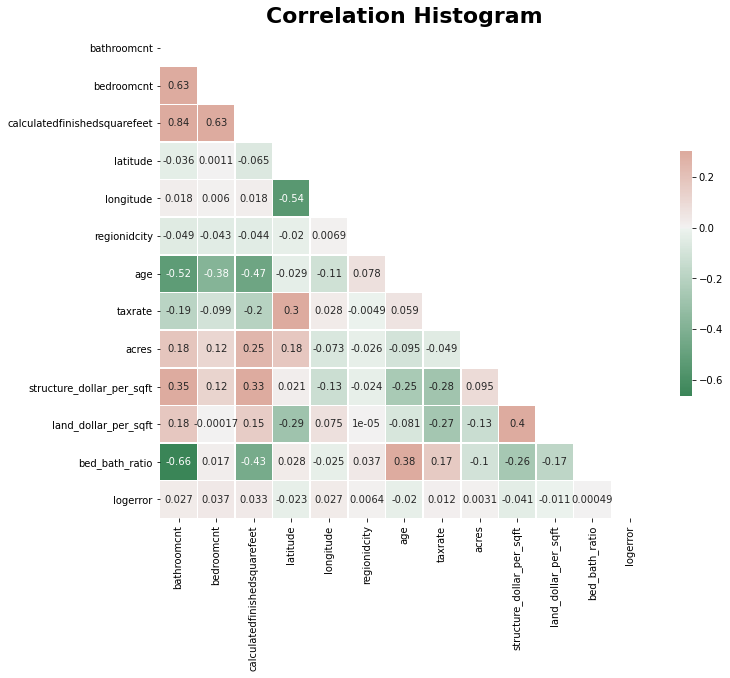

In [134]:
# going to try all columns:

# Creating a dataframe for a more managable heatmap
# corr_eval_df = train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio', 'county', 'logerror']]
corr_eval_df = train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'regionidcity', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio', 'logerror']]

# Code for the heatmap itself:
corr = corr_eval_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Histogram", fontsize = 22, fontweight = 'bold')
plt.show()

#### Takeaway:

- There doesn't seem to be a highly correlated feature currently that has a strong correlation to the target variable `logerror`. Maybe adding clusters and new features will help identify more highly correlated features.

### Adding 1st Cluster

In [41]:

value_vars = ['calculatedfinishedsquarefeet', 'taxrate', 'structure_dollar_per_sqft']

def elbow_plot(cluster_vars):
    # elbow method to identify good k for us
    ks = range(2,20)
    
    # empty list to hold inertia (sum of squares)
    sse = []

    # loop through each k, fit kmeans, get inertia
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state = 123)
        kmeans.fit(X_train_scaled[cluster_vars])
        # inertia
        sse.append(kmeans.inertia_)

    print(pd.DataFrame(dict(k=ks, sse=sse)))

    # plot k with inertia
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow method to find optimal k')
    plt.show()

     k         sse
0    2  365.243030
1    3  276.436324
2    4  220.705182
3    5  186.842757
4    6  167.825953
5    7  150.283895
6    8  135.712206
7    9  124.213787
8   10  115.040852
9   11  107.480873
10  12  101.521425
11  13   95.848665
12  14   91.098010
13  15   86.169469
14  16   82.499391
15  17   78.929171
16  18   75.344083
17  19   72.272414


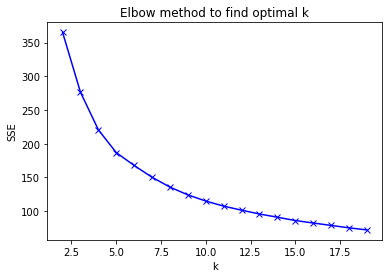

In [42]:
elbow_plot(cluster_vars = value_vars)

In [43]:
k = 6

def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [44]:
train_clusters, kmeans = run_kmeans(k=5, cluster_vars = ['calculatedfinishedsquarefeet', 'taxrate', 'structure_dollar_per_sqft'], cluster_col_name = 'value_cluster')

In [45]:
def get_centroids(cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [46]:
centroids = get_centroids(cluster_vars = value_vars, cluster_col_name='value_cluster')

In [47]:
centroids

,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
0,0,0.160203,0.251401,0.084494
1,1,0.664695,0.235669,0.173596
2,2,0.176756,0.402766,0.049257
3,3,0.419138,0.244813,0.121419
4,4,0.272617,0.247363,0.094382


In [48]:
centroids.shape, X_train_explore.shape, X_train_explore_scaled.shape, X_train_scaled.shape, X_train.shape

((5, 4), (28246, 24), (28246, 24), (28246, 23), (28246, 23))

In [49]:
X_train, X_train_scaled = explore.add_clusters(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'value_cluster')

In [50]:
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters, centroids, X_train_explore, X_train_explore_scaled, cluster_col_name = 'value_cluster')

In [51]:
# Adding clusters to validate and test df's:

validate_clusters = explore.kmeans_transform(X_validate_scaled, kmeans, value_vars, cluster_col_name = 'value_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, value_vars, cluster_col_name = 'value_cluster')

In [52]:
train_clusters.shape, validate_clusters.shape, test_clusters.shape

((28246, 1), (12106, 1), (10089, 1))

In [55]:
# Adding clusters and centroids to validate and test dfs.

X_validate, X_validate_scaled = explore.add_clusters(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'value_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'value_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419


### Adding 2nd Cluster

     k         sse
0    2  340.837833
1    3  187.833324
2    4  133.051835
3    5  109.237401
4    6   88.877286
5    7   76.135752
6    8   66.248770
7    9   58.378628
8   10   52.322219
9   11   47.562985
10  12   43.803092
11  13   40.247294
12  14   37.797918
13  15   35.398871
14  16   33.209705
15  17   31.074432
16  18   29.425234
17  19   27.788802


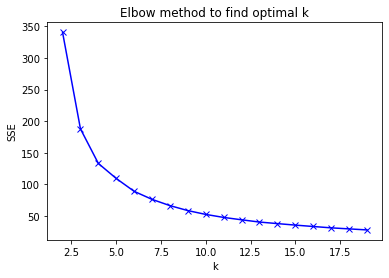

In [57]:
# Adding the second cluster:

cluster_vars = ['land_dollar_per_sqft', 'age']
elbow_plot(cluster_vars)

In [58]:
# Right at 5 centroids again. So we'll set our kmeans k = 5:

train_clusters2, kmeans2 = run_kmeans(k=5, cluster_vars = cluster_vars, cluster_col_name = 'land_cluster')

In [59]:
train_clusters2.land_cluster.value_counts()

1    9604
2    7228
4    4877
0    3408
3    3129
Name: land_cluster, dtype: int64

In [60]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382


In [61]:
def get_centroids(kmeans, cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [62]:
cluster_vars

['land_dollar_per_sqft', 'age']

In [63]:
centroids_2 = get_centroids(kmeans2, cluster_vars, cluster_col_name='land_cluster')

In [64]:
X_train, X_train_scaled = explore.add_clusters(train_clusters2, centroids_2, X_train, X_train_scaled, cluster_col_name = 'land_cluster')
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters2, centroids_2, X_train_explore, X_train_explore_scaled, cluster_col_name = 'land_cluster')

In [65]:
# fitting clusters to validate and test df's:

validate_clusters2 = explore.kmeans_transform(X_validate_scaled, kmeans2, cluster_vars, cluster_col_name = 'land_cluster')
test_clusters2 = explore.kmeans_transform(X_test_scaled, kmeans2, cluster_vars, cluster_col_name = 'land_cluster')

In [66]:
X_validate, X_validate_scaled = explore.add_clusters(validate_clusters2, centroids_2, X_validate, X_validate_scaled, cluster_col_name = 'land_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters2, centroids_2, X_test, X_test_scaled, cluster_col_name = 'land_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478


In [67]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577


In [68]:
X_validate_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
52901,0.500000,0.500000,0.442496,1.000000,0.608602,0.361062,0.015909,0.060089,0.714286,0.882353,0.079858,0.031625,0.023631,0.031396,0.0,0.0,1.0,0.117647,0.223124,0.015909,0.092795,0.049230,0.142857,3,0.419138,0.244813,0.121419,0,0.053814,0.105084
26478,0.166667,0.666667,0.274441,0.000000,0.488433,0.609990,0.015532,0.022785,0.000000,0.279412,0.045884,0.025328,0.021870,0.027677,1.0,0.0,0.0,0.720588,0.245083,0.015532,0.083682,0.046610,0.464286,4,0.272617,0.247363,0.094382,3,0.040129,0.682825
36966,0.166667,0.333333,0.206927,0.297297,0.264628,0.969361,0.054100,0.032814,0.428571,0.764706,0.016440,0.002035,0.000084,0.001911,0.0,1.0,0.0,0.235294,0.188943,0.054100,0.039014,0.000093,0.250000,0,0.160203,0.251401,0.084494,4,0.030599,0.240478
74471,0.250000,0.333333,0.316820,0.297297,0.260480,0.746009,0.003105,0.055276,0.571429,0.676471,0.046080,0.031094,0.028389,0.030862,0.0,1.0,0.0,0.323529,0.223039,0.003105,0.073492,0.238987,0.185714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
64375,0.500000,0.500000,0.421599,0.000000,0.587743,0.443018,0.010506,0.022785,0.000000,0.801471,0.065119,0.018070,0.010573,0.019887,1.0,0.0,0.0,0.198529,0.245661,0.010506,0.079238,0.032436,0.142857,3,0.419138,0.244813,0.121419,4,0.030599,0.240478


### Hypothesis Test:

##### Features: `age` and `land_dollar_per_sqft`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [69]:
alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 3].logerror
cluster_five = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 4].logerror

In [70]:
cluster_one

23906    0.606150
15704    0.592538
66569    0.561903
24840    0.592408
25408    0.594845
           ...   
7799     0.593852
72695    0.596917
53446    0.620486
6374     0.592030
52444    0.618836
Name: logerror, Length: 3408, dtype: float64

In [71]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(5.421549146773912, 0.00023220389388420675)

In [72]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


In [73]:
X_train_explore_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28246 entries, 15372 to 52444
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            28246 non-null  float64
 1   bedroomcnt                             28246 non-null  float64
 2   calculatedfinishedsquarefeet           28246 non-null  float64
 3   fips                                   28246 non-null  float64
 4   latitude                               28246 non-null  float64
 5   longitude                              28246 non-null  float64
 6   lotsizesquarefeet                      28246 non-null  float64
 7   regionidcity                           28246 non-null  float64
 8   roomcnt                                28246 non-null  float64
 9   yearbuilt                              28246 non-null  float64
 10  structuretaxvaluedollarcnt             28246 non-null  float64
 11

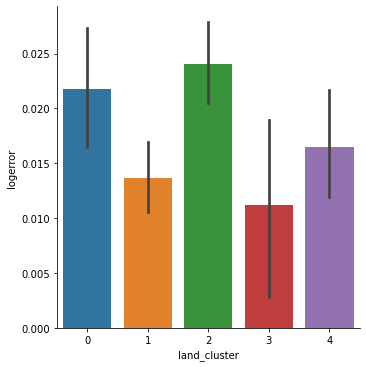

In [74]:
sns.catplot(x="land_cluster", y="logerror", kind="bar", data=X_train_explore)

Clusters 1 and 3 appear to have a lower average log error than the other clusters, so I'm going to take those into modeling.

### Adding 3rd Cluster

     k         sse
0    2  918.427818
1    3  680.501801
2    4  447.672799
3    5  323.229363
4    6  243.077653
5    7  193.276803
6    8  158.807189
7    9  142.267173
8   10  126.432100
9   11  111.157944
10  12   99.739438
11  13   88.795255
12  14   81.921374
13  15   76.475416
14  16   71.679480
15  17   67.379219
16  18   63.927304
17  19   60.560406


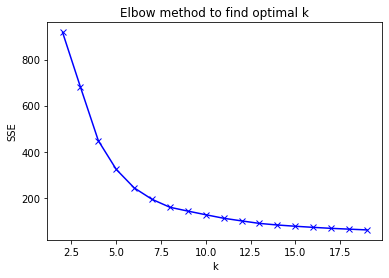

In [75]:
cluster_vars3 = ['latitude', 'longitude']
elbow_plot(cluster_vars3)

In [76]:
# Not too surprising, optimal k at 5 centroids again. So we'll set our kmeans k = 5:

train_clusters3, kmeans3 = run_kmeans(k=4, cluster_vars = cluster_vars3, cluster_col_name = 'location_cluster')

In [77]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577


In [78]:
centroids3 = get_centroids(kmeans3, cluster_vars3, cluster_col_name='location_cluster')

In [79]:
centroids3

,location_cluster,centroid_latitude,centroid_longitude
0,0,0.870655,0.705826
1,1,0.243073,0.871198
2,2,0.606201,0.418509
3,3,0.440942,0.696942


In [80]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters3], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore = pd.concat([X_train_explore, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore = X_train_explore.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore_scaled = pd.concat([X_train_explore_scaled, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore_scaled = X_train_explore_scaled.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

#### Adding to validate and test

In [81]:
# fitting clusters to validate and test df's:

validate_clusters3 = explore.kmeans_transform(X_validate_scaled, kmeans3, cluster_vars3, cluster_col_name = 'location_cluster')
test_clusters3 = explore.kmeans_transform(X_test_scaled, kmeans3, cluster_vars3, cluster_col_name = 'location_cluster')

In [82]:
# Adding centroids and clusters to validate and test dataframes.

X_validate, X_validate_scaled = explore.add_clusters(validate_clusters3, centroids3, X_validate, X_validate_scaled, cluster_col_name = 'location_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters3, centroids3, X_test, X_test_scaled, cluster_col_name = 'location_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,location_cluster,centroid_latitude,centroid_longitude
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084,2,0.606201,0.418509
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825,3,0.440942,0.696942
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478,1,0.243073,0.871198
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.243073,0.871198
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478,2,0.606201,0.418509


In [83]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,location_cluster,centroid_latitude,centroid_longitude
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,3,0.440942,0.696942
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,3,0.440942,0.696942
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,2,0.606201,0.418509
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.243073,0.871198
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,2,0.606201,0.418509


In [84]:
X_train_scaled.location_cluster.value_counts()

3    12813
1     6783
2     6623
0     2027
Name: location_cluster, dtype: int64

### Hypothesis Test:

##### Features: `latitude` and `logitude` 

$H_0$: The population means for the 4 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 4 clusters are not equal (there **is** a significant difference)

In [85]:
alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 3].logerror

In [86]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four)
f, p

(11.785964009445221, 1.0343212206996524e-07)

In [87]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


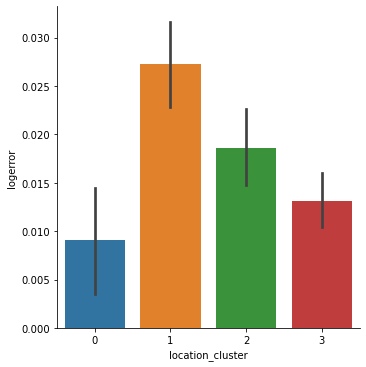

In [88]:
sns.catplot(x="location_cluster", y="logerror", kind="bar", data=X_train_explore)

#### Takeaways:

- It appears that location data combined with age clusters makes for even stronger ANOVA test results.
- If there were more time, I would want to do individual independing t-tests in order to determine which cluster's `logerror` means varys the most from the population mean.

### Adding 4th Cluster

     k         sse
0    2  677.725634
1    3  465.782594
2    4  330.339971
3    5  276.184255
4    6  210.121258
5    7  165.491622
6    8  133.490379
7    9  104.143499
8   10   85.056278
9   11   70.844587
10  12   63.372706
11  13   58.110644
12  14   52.948877
13  15   46.961373
14  16   42.691950
15  17   36.120557
16  18   32.218765
17  19   27.632988


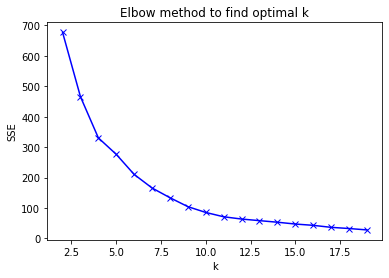

In [89]:
cluster_vars4 = ['bedroomcnt', 'bathroomcnt']
elbow_plot(cluster_vars4)

In [90]:
train_clusters4, kmeans4 = run_kmeans(k=4, cluster_vars = cluster_vars4, cluster_col_name = 'rooms_cluster')

In [91]:
centroids4 = get_centroids(kmeans4, cluster_vars4, cluster_col_name='rooms_cluster')

In [135]:
X_train_scaled.shape

(28246, 50)

In [93]:
X_train, X_train_scaled = explore.add_clusters(train_clusters4, centroids4, X_train, X_train_scaled, cluster_col_name = 'rooms_cluster')
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters4, centroids4, X_train_explore, X_train_explore_scaled, cluster_col_name = 'rooms_cluster')

In [94]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,location_cluster,centroid_latitude,centroid_longitude,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,3,0.440942,0.696942,2,0.331365,0.168928
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,3,0.440942,0.696942,0,0.155796,0.054997
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,2,0.606201,0.418509,2,0.331365,0.168928
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.243073,0.871198,1,0.523749,0.259913
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,2,0.606201,0.418509,1,0.523749,0.259913


In [95]:
# fitting clusters to validate and test df's:

validate_clusters4 = explore.kmeans_transform(X_validate_scaled, kmeans4, cluster_vars4, cluster_col_name = 'rooms_cluster')
test_clusters4 = explore.kmeans_transform(X_test_scaled, kmeans4, cluster_vars4, cluster_col_name = 'rooms_cluster')

In [96]:
X_validate, X_validate_scaled = explore.add_clusters(validate_clusters4, centroids4, X_validate, X_validate_scaled, cluster_col_name = 'rooms_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters4, centroids4, X_test, X_test_scaled, cluster_col_name = 'rooms_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,location_cluster,centroid_latitude,centroid_longitude,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084,2,0.606201,0.418509,3,0.587845,0.580627
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825,3,0.440942,0.696942,1,0.523749,0.259913
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478,1,0.243073,0.871198,2,0.331365,0.168928
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.243073,0.871198,2,0.331365,0.168928
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478,2,0.606201,0.418509,3,0.587845,0.580627


In [97]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((28246, 36), (12106, 36), (10089, 36))

In [98]:
X_train_explore_scaled.rooms_cluster.value_counts()

2    12789
1     8625
0     4523
3     2309
Name: rooms_cluster, dtype: int64

### Hypothesis Test:

##### Features: `bedroomcnt` and `bathroomct`

$H_0$: The population means for the 4 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 4 clusters are not equal (there **is** a significant difference)

In [99]:
alpha = .05

# There are only 4 clusters this time since I set the Kmeans = 4

cluster_one = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 3].logerror

In [100]:
# Checking if the levene results mean I need to run a Kruskal-Wallis test:

stats.levene(cluster_one, cluster_two, cluster_three, cluster_four)

LeveneResult(statistic=51.80234659112358, pvalue=2.21595833015447e-33)

In [101]:
# Since my levene test p-value was < my alpha of .05, I need to run the non-parametric Kruskal-Wallis test instead of ANOVA.
stats.kruskal(cluster_one, cluster_two, cluster_three, cluster_four)

KruskalResult(statistic=175.3440223913928, pvalue=8.930398324259723e-38)

In [102]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four)
f, p


(16.317576498599855, 1.3624790149405308e-10)

In [103]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


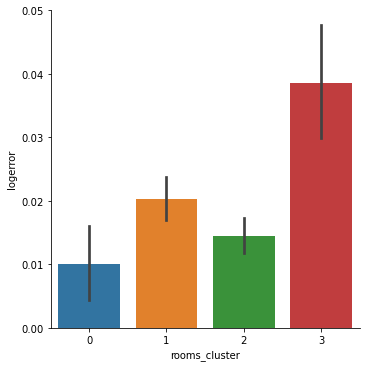

In [104]:
sns.catplot(x="rooms_cluster", y="logerror", kind="bar", data=X_train_explore)

#### Takeaways:
- Again, more variance between the groups. Possible to use these clusters in modeling.

In [105]:
# characterizing clusters:

X_train.groupby(['rooms_cluster'])['bedroomcnt', 'bathroomcnt'].agg(['mean', 'median', 'std', 'min', 'max'])

bedroomcnt                            bathroomcnt         \
                    mean median       std  min  max        mean median   
rooms_cluster                                                            
0               1.934778    2.0  0.246945  1.0  2.0    1.329980    1.0   
1               4.142493    4.0  0.418978  3.0  7.0    2.559478    2.5   
2               2.988193    3.0  0.174011  2.0  4.0    2.013566    2.0   
3               4.527068    5.0  0.858629  2.0  7.0    4.483759    4.0   

                                   
                    std  min  max  
rooms_cluster                      
0              0.465115  1.0  3.0  
1              0.509760  1.0  3.5  
2              0.582423  1.0  4.0  
3              0.724551  3.0  7.0

In [106]:
X_train.groupby(['location_cluster'])['latitude', 'longitude'].agg(['mean', 'median', 'std', 'min', 'max'])

latitude                                             \
                       mean     median       std        min        max   
location_cluster                                                         
0                 34.622243  34.629752  0.069143  34.362339  34.812397   
1                 33.699306  33.705116  0.121631  33.340851  33.931398   
2                 34.232948  34.222048  0.092383  34.008789  34.507840   
3                 33.989906  33.992454  0.122826  33.708978  34.271939   

                   longitude                                                
                        mean      median       std         min         max  
location_cluster                                                            
0                -118.131847 -118.143743  0.108066 -118.636202 -117.653901  
1                -117.818220 -117.822333  0.129131 -118.326424 -117.572338  
2                -118.678268 -118.574191  0.263140 -119.475265 -118.292181  
3                -118.149361 -118.157295  0.181939 -118.486515 -117.691958

# Modeling

In [109]:

# Split clusters in to dummy varaibles for modeling

X_train_scaled = pd.get_dummies(X_train_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])
X_validate_scaled = pd.get_dummies(X_validate_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])
X_test_scaled = pd.get_dummies(X_test_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])


X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((28246, 50), (12106, 50), (10089, 50))

In [110]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,...,centroid_bedroomcnt,centroid_bathroomcnt,rooms_cluster_0,rooms_cluster_1,rooms_cluster_2,rooms_cluster_3,value_cluster_0,value_cluster_1,value_cluster_2,value_cluster_3,value_cluster_4,location_cluster_0,location_cluster_1,location_cluster_2,location_cluster_3,land_cluster_0,land_cluster_1,land_cluster_2,land_cluster_3,land_cluster_4
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,...,0.331365,0.168928,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,...,0.155796,0.054997,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,...,0.331365,0.168928,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,...,0.523749,0.259913,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,...,0.523749,0.259913,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [111]:
baseline_mean = np.mean(y_train.logerror)
baseline_median = np.median(y_train.logerror)
baseline_mean, baseline_median

(0.017510878909501218, 0.00663736379591)

Going with the mean of `logerror` as the baseline model.

(0.0, 8.0)

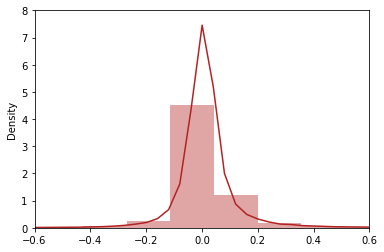

In [112]:
sns.distplot(y_train, color = 'firebrick')
plt.xlim(-.6, .6)
plt.ylim(0,8)

In [136]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 5)
rfe.fit(X_train_scaled, y_train)
ranks = rfe.ranking_
names = X_train_scaled.columns.tolist()
pd.DataFrame({'features': names, 'rank': ranks}).set_index('rank').sort_index().head(10)

,features
rank,
1,land_cluster_1
1,centroid_age
1,land_cluster_3
1,age
1,yearbuilt
2,land_cluster_0
3,land_cluster_2
4,Ventura
5,LA


In [144]:
# encode as variable
# np.full modiefies shape turns value in to a full series object
baseline_rmse = mean_squared_error(y_train, np.full(y_train.shape[0], np.mean(y_train)))**(1/2)
print (f'The baseline_rmse is {baseline_rmse}')  # Model Error To Beat 0.16287423418470207

The baseline_rmse is 0.17284510813932977


In [108]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,location_cluster,centroid_latitude,centroid_longitude,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,3,0.440942,0.696942,2,0.331365,0.168928
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,3,0.440942,0.696942,0,0.155796,0.054997
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,2,0.606201,0.418509,2,0.331365,0.168928
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.243073,0.871198,1,0.523749,0.259913
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,2,0.606201,0.418509,1,0.523749,0.259913


In [117]:
X_train_features = X_train_scaled[['centroid_latitude', 'centroid_longitude', 'age']]
X_train_features2 = X_train_scaled[['location_cluster_0', 'location_cluster_3', 'calculatedfinishedsquarefeet', 'fips']]

X_validate_features = X_validate_scaled[['centroid_latitude', 'centroid_longitude', 'age']]
X_validate_features2 = X_validate_scaled[['location_cluster_0', 'location_cluster_3', 'calculatedfinishedsquarefeet', 'fips']]

X_test_features = X_test_scaled[['centroid_latitude', 'centroid_longitude', 'age']]
X_test_features2 = X_test_scaled[['location_cluster_0', 'location_cluster_3', 'calculatedfinishedsquarefeet', 'fips']]

Original features

In [118]:
y_train.mean()

logerror    0.017511
dtype: float64

## Train

#### Model 1 - Linear Regression

In [167]:
# Make Model
lm = LinearRegression()

# Fit Model
lm.fit(X_train_features, y_train)

# Make Predictions
lm_pred = lm.predict(X_train_features)

# Compute root mean squared error
lm_rmse = mean_squared_error(y_train, lm_pred)**(1/2)

lm_rmse

0.1727587582024254

#### Model 1b - Linear Regression, different features

In [121]:
# Make Model
lm_1b = LinearRegression()

# Fit Model
lm_1b.fit(X_train_features2, y_train)

# Make Predictions
lm_pred_1b = lm_1b.predict(X_train_features2)

# Compute root mean squared error
lm_rmse_1b = mean_squared_error(y_train, lm_pred_1b)**(1/2)

lm_rmse_1b

0.17266294679381755

#### Model 2 - Polynomial Regression

In [173]:
# Make the model
pf = PolynomialFeatures(degree=2)

# Fitting the model
X_train_squared = pf.fit_transform(X_train_features2)
X_validate_squared = pf.transform(X_validate_features2)
X_test_squared = pf.transform(X_test_features2)

# predict:

lm_squared = LinearRegression()
lm_squared.fit(X_train_squared, y_train.logerror)

lm_sqrd_pred = lm_squared.predict(X_train_squared)

#RMSE:
lm_squared_RMSE = mean_squared_error(y_train, lm_sqrd_pred)**(1/2)
lm_squared_RMSE

0.17262318912770538

#### Model 2b - Polynomial Regression

In [174]:
# Make the model
pf2 = PolynomialFeatures(degree=2)

# Fitting the model
X_train_squared2 = pf.fit_transform(X_train_features2)
X_validate_squared2 = pf.transform(X_validate_features2)
X_test_squared2 = pf.transform(X_test_features2)

# predict:

lm_squared2 = LinearRegression()
lm_squared2.fit(X_train_squared2, y_train.logerror)

lm_sqrd_pred2 = lm_squared2.predict(X_train_squared)

#RMSE:
lm_squared_RMSE2 = mean_squared_error(y_train, lm_sqrd_pred2)**(1/2)
lm_squared_RMSE2

0.17262318912770538

#### Model 3 - LassoLars

In [123]:
# Make a model
lars = LassoLars(alpha=1)
# Fit a model
lars.fit(X_train_features, y_train)
# Make Predictions
lars_pred = lars.predict(X_train_features)
# Computer root mean squared error
lars_rmse = mean_squared_error(y_train, lars_pred)**(1/2)
lars_rmse

0.17284510813932977

#### Model 4 - Tweedie Regression

In [124]:
tw = TweedieRegressor(power=0, alpha=0.1) # 0 = normal distribution
# Fit Model
tw.fit(X_train_features, y_train)
# Make Predictions
tw_pred = tw.predict(X_train_features)
# Compute root mean squared error
tw_rmse = mean_squared_error(y_train, tw_pred)**(1/2)
tw_rmse

0.17281572868521403

In [126]:
tw_2 = TweedieRegressor(power=0, alpha=0.1) # 0 = normal distribution
# Fit Model
tw_2.fit(X_train_features2, y_train)
# Make Predictions
tw_pred_2 = tw_2.predict(X_train_features2)
# Compute root mean squared error
tw_rmse_2 = mean_squared_error(y_train, tw_pred_2)**(1/2)
tw_rmse_2

0.17275513072853863

#### Model 5 - RFE Comparison

In [146]:
## Assessing the RFE using a linear regression model
lm_basic = LinearRegression()

rfe_basic = RFE(lm, 4)

lm_X_rfe = rfe_basic.fit_transform(X_train_scaled, y_train) 

In [147]:
## Here we want to filter through and return only the best features
mask = rfe_basic.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 4 features: yearbuilt, age, centroid_age, land_cluster_3


In [148]:
lm_basic.fit(lm_X_rfe, y_train)

LinearRegression()

In [157]:
print("Linear Model:", lm_basic)

print("intercept: ", lm_basic.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm_basic.coef_)

Linear Model: LinearRegression()
intercept:  [-6.85125252e+11]
features:  Index(['yearbuilt', 'age', 'centroid_age', 'land_cluster_3'], dtype='object')
coefficients:  [[ 6.85125252e+11  6.85125252e+11  8.39296270e-03 -2.08070148e-03]]


In [158]:
## Here we're going to add a column that will make property value predictions using the linear model
y_train_predict = y_train.copy()

y_train_predict['yhat_lm'] = lm_basic.predict(lm_X_rfe)

y_train_predict.head()

,logerror,yhat_lm
15372,0.040576,0.016724
25551,-0.220377,0.011230
35475,-0.017587,0.016846
33783,-0.015516,0.018066
5437,-0.006203,0.017822


In [159]:
## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train_predict.logerror, y_train_predict.yhat_lm))
RMSE_lm

r2_lm = lm_basic.score(lm_X_rfe, y_train_predict.logerror)

r2_lm

0.0003318718320400871

In [160]:
output = "{} = {:.4} + {:.2} * {} + {:.3} * {}".format(
    y_train_predict.columns[0],
    lm_basic.intercept_[0],
    lm_basic.coef_[0][0],
    rfe_features[0],
    lm_basic.coef_[0][1],
    rfe_features[1],
)
output

'logerror = -6.851e+11 + 6.9e+11 * yearbuilt + 6.85e+11 * age'

In [162]:
y_train_predict['yhat_baseline'] = y_train['logerror'].mean()
# y_train_predict.drop(columns = 'yhat_baseline', inplace = True)
y_train_predict

,logerror,yhat_lm,yhat_baseline
15372,0.040576,0.016724,0.017511
25551,-0.220377,0.011230,0.017511
35475,-0.017587,0.016846,0.017511
33783,-0.015516,0.018066,0.017511
5437,-0.006203,0.017822,0.017511
...,...,...,...
77158,-0.064621,0.008545,0.017511
20266,0.057423,0.017456,0.017511
51778,-0.074590,0.017212,0.017511
17590,-0.040330,0.017212,0.017511


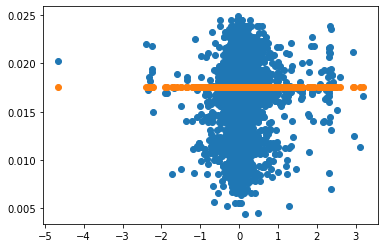

In [163]:
plt.scatter(y_train_predict.logerror, y_train_predict.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_train_predict.logerror, y_train_predict.yhat_baseline, label='Baseline Predicitions', marker='o')

#### Takeaway:

- Our linear regression model isn't doing much better than the baseline model. It is interesting to note that there appear to be some kind of grouping within this model's yhat predictions. This could mean that the model is reflecting the clusters (or centroids) that the RFE identified as the strongest features to use.

### Ranking Results of the Train stage:

In [164]:
results = baseline_rmse, lm_rmse, lm_rmse_1b, lm_squared_RMSE, lm_squared_RMSE2, lars_rmse, tw_rmse, tw_rmse_2
result_names = ["baseline_rmse", "lm_rmse", "lm_rmse_2", "poly_RMSE", "poly_RMSE_2", "lars_rmse", "tw_rmse", "tw_rmse_2"]
result_names

['baseline_rmse',
 'lm_rmse',
 'lm_rmse_2',
 'poly_RMSE',
 'poly_RMSE_2',
 'lars_rmse',
 'tw_rmse',
 'tw_rmse_2']

In [165]:
# Ranking the results:

result_df = pd.DataFrame({'results': results, 'model': result_names}).set_index('model')
result_df['rank'] = result_df['results'].rank().round()
result_df.sort_values(by = ['rank'])

,results,rank
model,,
poly_RMSE,0.172623,2.0
poly_RMSE_2,0.172623,2.0
lm_rmse_2,0.172663,3.0
tw_rmse_2,0.172755,4.0
lm_rmse,0.172759,5.0
tw_rmse,0.172816,6.0
baseline_rmse,0.172845,8.0
lars_rmse,0.172845,8.0


### Conlusion from Train:

- The polynomial and 2nd Lindear regression models appears to have done the best on the train data. We'll see if these models overfit the train data by running them on the validate dataset.
- My models only beat out the baseline by .0006, meaning that the difference in absolute terms is small. However, consideirng that this is log error and such a small number to begin with, I expected that I would have to go several decimal places over in order to find a improvement (if any exists).

## Validate

#### Linear Regression

In [170]:
# Predictions
lm_pred_v = lm_1b.predict(X_validate_features2)

# RMSE
lm_rmse_v = mean_squared_error(y_validate, lm_pred_v)**(1/2)
lm_rmse_v

0.17875097374875204

In [186]:
# Make the model
pf2_v = PolynomialFeatures(degree=2)

# Fitting the model
X_train_squared2 = pf.fit_transform(X_train_features2)
X_validate_squared2 = pf.transform(X_validate_features2)
X_test_squared2 = pf.transform(X_test_features2)

# predict:

lm_squared2_v = LinearRegression()
lm_squared2_v.fit(X_train_squared2, y_train.logerror)

lm_sqrd_pred2_v = lm_squared2_v.predict(X_validate_squared2)

#RMSE:
lm_squared_RMSE2_v = mean_squared_error(y_validate, lm_sqrd_pred2_v)**(1/2)
lm_squared_RMSE2_v

0.17870022873842878

In [187]:
# Feed new features in to linear model. 
lm_squared = LinearRegression(normalize=True)
lm_squared.fit(X_train_features, y_train)
# Make predictions
lm_squared_pred_v = lm_squared.predict(X_validate_features)
# Compute root mean squared error
lm_squared_rmse_v = mean_squared_error(y_validate, lm_squared_pred_v)**(1/2)
lm_squared_rmse_v

0.17870946151988715

In [188]:
results_v = baseline_rmse, lm_rmse_v, lm_squared_rmse_v, lm_squared_RMSE2_v
result_names_v = ["baseline_rmse", "lm_rmse", "polynomial_RMSE", "polynomial_RMSE_2"]

result_df_v = pd.DataFrame({'results': results_v, 'model': result_names_v}).set_index('model')
result_df_v['rank'] = result_df_v['results'].rank().round()
result_df_v.sort_values(by = ['rank'])

,results,rank
model,,
baseline_rmse,0.172845,1.0
polynomial_RMSE_2,0.178700,2.0
polynomial_RMSE,0.178709,3.0
lm_rmse,0.178751,4.0


In [189]:
# This means the models were overfit on the train dataset. My best model was the linear Regression model, so I'll run that one through test.

# Test

In [191]:
# predict:

lm_squared2_t = LinearRegression()
lm_squared2_t.fit(X_train_squared2, y_train.logerror)

lm_sqrd_pred2_t = lm_squared2_t.predict(X_test_squared2)

#RMSE:
lm_squared_RMSE2_t = mean_squared_error(y_test, lm_sqrd_pred2_t)**(1/2)
lm_squared_RMSE2_t

0.16927543136625922

In [193]:
results_t = baseline_rmse, lm_squared_RMSE2_t
result_names_t = ["baseline_rmse", "poly_rmse_2"]

result_df_t = pd.DataFrame({'results': results_t, 'model': result_names_t}).set_index('model')
result_df_t['rank'] = result_df_t['results'].rank().round()
result_df_t.sort_values(by = ['rank'])

,results,rank
model,,
poly_rmse_2,0.169275,1.0
baseline_rmse,0.172845,2.0


## Model Evaluation:

- It appears that the data is too overfit to the train and test datasets. Since the models all fail to do better than the baseline on the validate dataset, it is probably safe to say that the better RMSE score for the 2nd version of the polynomial regression model over the baseline was a fluke.
- Having said that, the scores of the polynomial regression model across all datasets are very very close to the baseline model. Even if the model is overfit, it doesn't appear to be overfit by much.

# Next Steps:

- I spent a lot of time doing many combinations of features, both raw features and derived features to find something that would improve the prediction of `logerror`, however wasn't able to find that perfect combination. I would want to spend more time exploring or evaluating different clusters to try and find a better combination for modeling.

- **Additional Data**: Having access to more supply and demand type of data would be useful. The problem we are trying to solve is, what causes `logerror`? The biggest difference in the Zestimate being different than the actual selling price of the home is the forces of supply and demand.
    - School District coverage and quality info.
    - Data to determine driving/walking distance to ammenities/shopping/essential services (fire, police, etc).
    - Distance from the beach (Could've added this, but ran out of time)
    - Distance from major employers or employement centers in the cities covered.

- Different Models: Using RFE to find the best features for use in models did not result in a model that beat the baseline model consistently. While less likely than adding more information to the dataset, I would have liked more time to experiment with different features specifically geared towards location of properties in relation to county. Having said that, the polynomial regression model which was consitently the best model still was close to beating the baseline.

- Reduce the number of outliers and perform more independent t-tests on individual clusters vs the mean of the population or mean of the overal clusters. For example, the location clusters, there was a noticably lower mean of 2 of the subgroups' `logerror` vs the overall mean of the population's `logerror` indicating that perhaps using one or more of those sub-clusters may result in a better model to predict `logerror`.

